## Optimisation de Stratégies de Trading via Reinforcement Learning 


#### Analyse de Performance d'un Agent de Trading Basé sur le Deep Learning pour la Cryptomonnaie : Évaluation et Analyse
lien dataset :** https://www.kaggle.com/datasets/prasoonkottarathil/ethereum-historical-dataset**

##### Description du Projet

Ce projet a pour objectif de développer un agent de trading en utilisant l'algorithme d'Optimisation de Politique Proximale (PPO) pour prendre des décisions de trading sur le marché des cryptomonnaies. L'agent sera formé et évalué à l'aide de données historiques du prix de l'Ethereum (ETH) sur un intervalle de 15 minutes.

#### Étapes du Code

1. **Prétraitement des Données** : Chargement et prétraitement des données historiques de prix de l'Ethereum à partir d'un fichier CSV. Calcul et ajout d'indicateurs techniques tels que la Moyenne Mobile Simple (SMA), l'Indice de Force Relative (RSI), les Bandes de Bollinger (BB), l'Oscillateur Stochastique, la Moyenne Mobile Exponentielle (EMA) et la Moyenne de la Plage Vraie (ATR) au dataset.

2. **Ensembles d'Entraînement et de Test** : Division du dataset en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test). Possibilité de mettre en œuvre une Validation Croisée K-fold.

3. **Boucle d'Entraînement et d'Évaluation** : Création d'un `TradingEnvironment` pour les ensembles d'entraînement et de validation. Utilisation de `DummyVecEnv` pour convertir l'environnement en un environnement vectorisé. Initialisation du modèle PPO avec la `"MlpPolicy"` et entraînement sur l'environnement d'entraînement en utilisant l'algorithme PPO. Après l'entraînement, le modèle formé est utilisé pour faire des prédictions sur l'environnement de validation.

4. **Sauvegarde des Résultats de Test** : Enregistrement des résultats de test, y compris la date, les prix d'ouverture, haut, bas et de clôture, le volume, les indicateurs techniques, les actions prises par l'agent, les niveaux de stop-loss, les niveaux de prise de profit et le solde dans des fichiers CSV séparés pour analyse.

### Résultats Attendus

Les résultats attendus de ce projet sont :

1. Le modèle PPO apprendra à prendre des décisions de trading basées sur les données historiques de prix et les indicateurs techniques calculés.

2. Les résultats de test pour chaque fold fourniront des aperçus de la performance de l'agent de trading, incluant les actions prises, les niveaux de stop-loss et de prise de profit, et le solde final du compte.

3. En analysant les résultats de test, nous pouvons évaluer l'efficacité de l'agent de trading formé et obtenir des aperçus de sa performance dans différentes conditions de marché.

---

## Analyse de la Performance de l'Agent de Trading

Cette section fournit une analyse complète et une évaluation de la performance de l'agent de trading basé sur le deep learning dans le marché des cryptomonnaies. L'analyse inclut des visualisations et des métriques qui fournissent des aperçus des décisions de trading de l'agent, de sa rentabilité, et une comparaison avec une stratégie d'achat et de conservation.


### Importation des Bibliothèques Nécessaires

Pour exécuter le code avec succès, assurez-vous d'importer les bibliothèques suivantes :

- `os` : Pour interagir avec le système d'exploitation.
- `gym` : OpenAI Gym pour les environnements d'apprentissage par renforcement.
- `numpy` : Une bibliothèque de calcul numérique pour des opérations efficaces sur les tableaux.
- `pandas` : Une bibliothèque de manipulation de données pour travailler avec des données structurées.
- `ta` : Une bibliothèque pour l'analyse technique des marchés financiers.
- `stable_baselines3` : Une bibliothèque pour les algorithmes d'apprentissage par renforcement.
- `sklearn` : Une bibliothèque pour l'apprentissage automatique et les tâches de prétraitement des données.
- `matplotlib.pyplot` : Une bibliothèque de tracé pour les visualisations.
- `mplfinance` : Un module au sein de Matplotlib pour le tracé financier.

-----------------------------------------------------------------------------------------------


* gym : Environnements d'apprentissage par renforcement.
* numpy : Calcul numérique et manipulation de tableaux.
* pandas : Manipulation de données tabulaires.
* ta (Technical Analysis) : Analyse technique des données financières.
* stable_baselines3 : Apprentissage par renforcement.
* scikit-learn : Bibliothèque d'apprentissage automatique.
* matplotlib : Création de graphiques et de visualisations.

In [1]:
! pip install gym
! pip install numpy
! pip install pandas
! pip install ta
! pip install stable_baselines3
! pip install scikit-learn
! pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=eff57426a16374c42c38b5cb1fe49616f05f2e88a2474d395458b03965b10404
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 21.1 MB/s eta 0:00:00


In [5]:
!pip install mplfinance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [6]:
# Importation du module os pour les opérations liées au système d'exploitation
import os

# Importation du module gym et de l'espace (spaces) depuis gym pour les environnements d'apprentissage par renforcement
import gym
from gym import spaces

# Importation de numpy pour les opérations numériques
import numpy as np

# Importation de pandas pour la manipulation de données en format tabulaire
import pandas as pd

# Importation de la bibliothèque ta (Technical Analysis) pour l'analyse technique des données financières
import ta

# Importation de PPO (Proximal Policy Optimization) depuis stable_baselines3 pour l'apprentissage par renforcement
from stable_baselines3 import PPO

# Importation de DummyVecEnv depuis stable_baselines3.common.vec_env pour les environnements vectoriels factices
from stable_baselines3.common.vec_env import DummyVecEnv

# Importation de train_test_split depuis sklearn.model_selection pour la division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Importation de pyplot depuis matplotlib.pyplot pour la création de graphiques
import matplotlib.pyplot as plt

# Importation de mplfinance pour la création de graphiques financiers
import mplfinance as mpf



* Description de l'Environnement de Trading
L'Environnement de Trading est un environnement Gym personnalisé conçu pour simuler un environnement de trading de crypto-monnaies pour l'entraînement et l'évaluation d'agents de trading. Il fournit une interface permettant à l'agent d'observer le marché, de prendre des actions et de recevoir des récompenses en fonction de ses actions.

* Espace d'Observation
L'espace d'observation de l'environnement est un tableau NumPy 2D de forme (lookback, num_features), où :

lookback est le nombre d'étapes temporelles précédentes à considérer pour chaque observation.
num_features est le nombre de caractéristiques dans les données d'entrée, à l'exclusion de l'horodatage et de la variable cible.
Chaque élément de l'observation représente une valeur de caractéristique spécifique à un instant donné. Ces caractéristiques peuvent inclure des indicateurs techniques tels que les moyennes mobiles, l'indice de force relative (RSI), les bandes de Bollinger (BB), l'oscillateur stochastique, la plage moyenne réelle (ATR), le prix moyen pondéré par le volume (VWAP) et les moyennes mobiles exponentielles (EMA).

* Espace d'Action
L'espace d'action de l'environnement est un espace discret avec trois actions possibles :

* 0: Acheter
* 1: Vendre
* 2: Conserver
L'agent peut choisir l'une de ces actions à chaque étape temporelle pour effectuer l'action de trading correspondante sur le marché.

Récompenses
L'agent reçoit des récompenses en fonction de ses actions et de l'état du marché. Le calcul des récompenses est basé sur plusieurs facteurs, notamment la direction des prix prédite, les mouvements des prix et la stratégie de trading de l'agent.

Des récompenses positives sont données lorsque l'agent réalise des transactions rentables ou effectue des prédictions correctes sur la direction des prix. Des récompenses négatives sont données pour des prédictions incorrectes ou des transactions non rentables.

**** Mécanisme de Trading
Le mécanisme de trading dans l'environnement suit un processus de trading simulé. L'agent peut soit ouvrir une position longue (achat) soit une position courte (vente) en fonction de ses actions. Il peut également choisir de conserver sa position.

L'environnement suit le solde du compte de l'agent en dollars américains et le solde de crypto-monnaie, ainsi que la position (achat, vente ou conservation), le prix d'achat, le prix de prise de profit et le prix de stop suiveur. Les niveaux de prise de profit et de stop suiveur sont calculés en fonction de la plage moyenne réelle (ATR) de l'étape temporelle actuelle.

Si le niveau de prise de profit ou de stop suiveur de l'agent est atteint, l'environnement clôture la position et ajuste le solde du compte et le solde de la crypto-monnaie en conséquence. Des frais de transaction sont également déduits du solde du compte pour chaque transaction.

Fonctions de Réinitialisation et d'Étape
L'environnement fournit une fonction reset() qui réinitialise l'environnement à son état initial et renvoie l'observation initiale.

La fonction step(action) est utilisée pour effectuer une action dans l'environnement. Elle prend une action en entrée et renvoie l'observation suivante, la récompense et un indicateur booléen indiquant si l'épisode est terminé. L'épisode est considéré comme terminé lorsque toutes les étapes temporelles des données ont été traitées.

***** Sauvegarde des Résultats des Tests
L'environnement conserve diverses métriques pendant le processus de trading, notamment la date, les prix d'ouverture, de clôture, de haut, de bas, le volume, les indicateurs techniques, les actions prises par l'agent, les niveaux de stop suiveur et de prise de profit, et le solde. Ces métriques sont enregistrées dans des fichiers CSV distincts pour chaque pli de la validation croisée en K-fold. Les résultats des tests enregistrés peuvent être analysés pour évaluer les performances de l'agent de trading.

Veuillez noter que l'environnement peut être personnalisé davantage pour inclure des fonctionnalités, des indicateurs ou des mécanismes de trading supplémentaires selon des besoins spécifiques.

In [14]:
# Classe de l'environnement de trading
class TradingEnvironment(gym.Env):
    def __init__(self, df, lookback):
        # Initialisation de l'environnement de trading avec les paramètres requis
        self.last_action_time = 0
        self.profit_target = 0.02  # Par exemple, définir l'objectif de profit à 5 % de changement de prix
        self.data = df
        self.lookback = lookback
        self.current_step = self.lookback
        self.num_features = len(self.data.columns) - 2
        self.action_space = spaces.Discrete(3)  # Acheter, Vendre, Conserver
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.lookback, self.num_features), dtype=np.float32)
        self.account_balance = 10000  # Solde initial du compte en USD
        self.crypto_balance = 10  # Solde initial de crypto
        self.position = None
        self.take_profit_price = None
        self.trailing_stop_loss_price = None
        self.trailing_stop_gain_price = None
        self.purchase_price = None
        self.initial_investment = None

        # Initialisation d'un dictionnaire pour stocker les résultats des tests
        self.test_results = {
            'Date': [],
            'Open': [],
            'High': [],
            'Low': [],
            'Close': [],
            'Volume': [],
            'BB_Upper': [],
            'BB_Lower': [],
            'RSI': [],
            'Action': [],
            'Stop_Loss': [],
            'Take_Profit': [],
            'Balance': [],
        }

    def reset(self):
        # Réinitialise l'étape actuelle à la période de lookback
        self.current_step = self.lookback
        return self._get_observation()

    def _get_observation(self):
        # Obtient l'observation (les données) pour l'étape actuelle
        observation = self.data.iloc[self.current_step - self.lookback:self.current_step, 1:-1].values
        return observation

    def _get_price_direction(self):
        current_price = self.data.iloc[self.current_step]['close']

        future_prices = self.data.iloc[self.current_step + 1:self.current_step + 20]['close']
        future_lows = self.data.iloc[self.current_step + 1:self.current_step + 20]['low']
        future_highs = self.data.iloc[self.current_step + 1:self.current_step + 20]['high']

        # Calcule l'ATR pour l'étape actuelle
        current_atr = self.data.iloc[self.current_step]['atr']

        # Définit les niveaux de prise de profit et de stop loss initiaux en fonction de l'ATR
        take_profit_multiplier_long = 2.5  # Multiplicateur pour les positions longues
        stop_loss_multiplier_long = 1.0  # Multiplicateur pour les positions longues
        take_profit_multiplier_short = 2.5  # Multiplicateur pour les positions courtes
        stop_loss_multiplier_short = 1.0  # Multiplicateur pour les positions courtes


        take_profit_price_long = current_price + (current_atr * take_profit_multiplier_long)
        stop_loss_price_long = current_price - (current_atr * stop_loss_multiplier_long)

        take_profit_price_short = current_price - (current_atr * take_profit_multiplier_short)
        stop_loss_price_short = current_price + (current_atr * stop_loss_multiplier_short)

        # Initialisation des variables pour les conditions de prise de profit
        long_condition_met = False  # Condition de prise de profit pour une position longue non satisfaite par défaut
        short_condition_met = False  # Condition de prise de profit pour une position courte non satisfaite par défaut
        long_position_index = None  # Index de la position longue si la condition est satisfaite
        short_position_index = None  # Index de la position courte si la condition est satisfaite

        # Parcourt les prix futurs pour la prise de profit longue
        for i, future_high in enumerate(future_highs):
            if future_high >= take_profit_price_long:
                long_condition_met = True  # Condition de prise de profit longue satisfaite
                long_position_index = i  # Enregistre l'index de la position longue
                break  # Sort de la boucle après satisfaction de la condition longue

        # Parcourt les prix futurs pour la prise de profit courte
        for j, future_low in enumerate(future_lows):
            if future_low <= take_profit_price_short:
                short_condition_met = True  # Condition de prise de profit courte satisfaite
                short_position_index = j  # Enregistre l'index de la position courte
                break  # Sort de la boucle après satisfaction de la condition courte

        # Vérifie si à la fois la condition de prise de profit longue et courte est satisfaite
        if long_condition_met and short_condition_met:
            if long_position_index < short_position_index:
                return 1  # Augmentation prévue (position longue satisfaite en premier)
            else:
                return -1  # Diminution prévue (position courte satisfaite en premier)
        elif long_condition_met:
            return 1  # Augmentation prévue (seule la condition longue est satisfaite)
        elif short_condition_met:
            return -1  # Diminution prévue (seule la condition courte est satisfaite)
        else:
            return 0  # Direction incertaine (ni condition longue ni condition courte satisfaite)


    def calculate_reward(self, action):
        current_price = self.data.iloc[self.current_step]['close']
        current_high = self.data.iloc[self.current_step]['high']
        current_low = self.data.iloc[self.current_step]['low']
        future_price = self.data.iloc[self.current_step + 4]['close']


        price_difference = future_price - current_price
        price_direction = self._get_price_direction()

        # Retrieve indicators
        current_vwap = self.data['vwap'].iloc[self.current_step]
        current_atr = self.data.iloc[self.current_step]['atr']
        current_ema_values = [self.data[f'ema_{period}'].iloc[self.current_step] for period in [10, 20, 30, 40, 50, 60]]
        current_bb_upper = self.data['bb_upper'].iloc[self.current_step]
        current_bb_lower = self.data['bb_lower'].iloc[self.current_step]

        # Reward initialization
        reward = 0

        if action == 0:  # Buy

            if self.position == 'buy':
                if price_direction > 0:
                    reward = 1
                    if current_price > current_vwap and current_price < min(current_ema_values) and current_price <= current_bb_lower:
                        reward += 0.5  # If the stop loss level is hit but is still above purchase price, it's good.
                    if self.trailing_stop_loss_price is not None and current_low <= self.trailing_stop_loss_price:
                        if self.trailing_stop_loss_price > self.purchase_price :
                            reward += 0.3  # Boost the reward
                        else:
                            reward -= 1  # Penalize the reward
                    # If the take profit level is hit, boost the reward
                    if self.take_profit_price is not None and current_high >= self.take_profit_price:
                        reward += 1
                else:
                    reward = -1  # Penalize wrong prediction

            # Deduct transaction fee
            reward -=  0.001


        elif action == 1:  # Sell

            if self.position == "sell":
                if price_direction < 0:
                    reward = 1
                    if current_price < current_vwap and current_price > max(current_ema_values) and current_price >= current_bb_upper:
                        reward += 0.5 # If the stop loss level is hit but is still below purchase price, it's good.
                    if self.trailing_stop_loss_price is not None and current_high >= self.trailing_stop_loss_price:
                        if self.trailing_stop_loss_price < self.purchase_price:
                            reward += 0.3  # Boost the reward
                        else:
                            reward -= 1  # Penalize the reward
                    # If the take profit level is hit, boost the reward
                    if self.take_profit_price is not None and current_low <= self.take_profit_price:
                        reward += 1
                else:
                    reward = -1  # Penalize wrong prediction

            # Deduct transaction fee
            reward -= 0.001

        return reward

    def _calculate_predicted_direction(self, action):

        # Calculate the predicted direction based on the agent's action
        if action == 0:  # Buy
            predicted_direction = 1  # Price will go up
        elif action == 1:  # Sell
            predicted_direction = -1  # Price will go down
        else:  # Hold
            predicted_direction = 0  # No change in price

        return predicted_direction

    def step(self, action):
        transaction_fee_percent = 0.001  # 0.1%
        current_price = self.data.iloc[self.current_step]['close']
        current_high = self.data.iloc[self.current_step]['high']
        current_low = self.data.iloc[self.current_step]['low']

        # Calculate ATR for the current step
        current_atr = self.data.iloc[self.current_step]['atr']

        # Set the initial take profit and stop loss levels based on ATR
        take_profit_multiplier_long = 2.5  # Multiplier for long positions
        stop_loss_multiplier_long = 1.0  # Multiplier for long positions
        take_profit_multiplier_short = 2.5 # Multiplier for short positions
        stop_loss_multiplier_short = 1.0  # Multiplier for short positions

        take_profit_price_long = current_price + (current_atr * take_profit_multiplier_long)
        stop_loss_price_long = current_price - (current_atr * stop_loss_multiplier_long)
        take_profit_price_short = current_price - (current_atr * take_profit_multiplier_short)
        stop_loss_price_short = current_price + (current_atr * stop_loss_multiplier_short)

        # Set the trailing stop buffer
        stop_loss_buffer_percent = 0.001  # 1%

        # Force action to be hold if less than 4 steps passed since last buy/sell action
        if self.last_action_time < 4 and action in [0, 1]:
            action = 2  # Hold
        elif action in [0, 1]:
            self.last_action_time = 0  # Reset the last action time
        else:
            self.last_action_time += 1

        # Check if a position is already open, and if so, prevent a new action
        if self.position is not None and action in [0, 1]:  # If position is open and action is either buy or sell
            action = 2  # Force action to be hold

        if action == 0:  # Long position (expecting price to increase)
            if self.account_balance > current_price:
                self.crypto_balance += (self.account_balance / current_price) * (1 - transaction_fee_percent)
                self.initial_investment = self.account_balance

                self.account_balance = 0
                self.take_profit_price = take_profit_price_long
                self.trailing_stop_loss_price = stop_loss_price_long
                self.purchase_price = current_price
                self.position = "buy"

        elif action == 1:  # Short position (expecting price to decrease)
            if self.crypto_balance > 0:
                self.account_balance += self.crypto_balance * current_price * (1 - transaction_fee_percent)
                self.initial_investment = self.crypto_balance
                self.crypto_balance = 0
                self.take_profit_price = take_profit_price_short
                self.trailing_stop_loss_price = stop_loss_price_short
                self.purchase_price = current_price
                self.position = "sell"

        # Check for an open position (either long or short)
        if self.position:
            # Update trailing stop if the current price is moving in favor of the position
            if self.position == "buy" and current_low > self.purchase_price * (1 + stop_loss_buffer_percent) :
                self.trailing_stop_loss_price = current_low * (1 - stop_loss_buffer_percent)
            elif self.position == "sell" and current_high < self.purchase_price * ( 1 - stop_loss_buffer_percent) :
                self.trailing_stop_loss_price = current_high * (1 + stop_loss_buffer_percent)

            # Check if price has reached the take profit or stop loss level
        if self.take_profit_price is not None and (
            (self.position == "buy" and (current_high >= self.take_profit_price or current_low <= self.trailing_stop_loss_price)) or
            (self.position == "sell" and (current_low <= self.take_profit_price or current_high >= self.trailing_stop_loss_price))):

            if self.position == "buy":
                if current_high >= self.take_profit_price:
                    execution_price = self.take_profit_price
                elif current_low <= self.trailing_stop_loss_price:
                    execution_price = self.trailing_stop_loss_price

                crypto_to_sell = self.initial_investment / self.purchase_price
                usd_to_receive = crypto_to_sell * execution_price * (1 - transaction_fee_percent)
                self.crypto_balance -= crypto_to_sell  # selling all crypto that was initially bought
                self.account_balance += usd_to_receive  # adding the USD received from selling crypto

            elif self.position == "sell":
                if current_low <= self.take_profit_price:
                    execution_price = self.take_profit_price
                elif current_high >= self.trailing_stop_loss_price:
                    execution_price = self.trailing_stop_loss_price

                usd_to_spend = self.initial_investment * self.purchase_price
                crypto_to_receive = usd_to_spend / execution_price * (1 - transaction_fee_percent)
                self.crypto_balance += crypto_to_receive  # buying back all crypto that was initially sold
                self.account_balance -= usd_to_spend  # spending all the USD to buy back crypto

            self.position = None  # Close the position
            self.take_profit_price = None  # Reset take profit price
            self.trailing_stop_loss_price = None  # Reset trailing stop loss price
            self.purchase_price = None
            self.initial_investment = None

        reward = self.calculate_reward(action)
        done = False
        predicted_direction = self._calculate_predicted_direction(action)
        actual_direction = self._get_price_direction()
        price_movements = abs(self.data.iloc[self.current_step:self.current_step + 4]['close'].diff().sum())


        current_date = self.data.iloc[self.current_step]['date']
        current_open = self.data.iloc[self.current_step]['open']
        current_high = self.data.iloc[self.current_step]['high']
        current_low = self.data.iloc[self.current_step]['low']
        current_close = self.data.iloc[self.current_step]['close']
        current_volume = self.data.iloc[self.current_step]['volume']
        current_sma = self.data.iloc[self.current_step]['sma']
        current_rsi = self.data.iloc[self.current_step]['rsi']
        current_bb_upper = self.data.iloc[self.current_step]['bb_upper']
        current_bb_lower = self.data.iloc[self.current_step]['bb_lower']
        current_stoch = self.data.iloc[self.current_step]['stoch']
        current_atr = self.data.iloc[self.current_step]['atr']
        current_ema_values = [self.data[f'ema_{period}'].iloc[self.current_step] for period in [10, 20, 30, 40, 50, 60]]
        current_balance = self.account_balance + (self.crypto_balance * self.data['close'].iloc[self.current_step])

        self.test_results['Date'].append(current_date)
        self.test_results['Open'].append(current_open)
        self.test_results['High'].append(current_high)
        self.test_results['Low'].append(current_low)
        self.test_results['Close'].append(current_close)
        self.test_results['Volume'].append(current_volume)
        self.test_results['BB_Upper'].append(current_bb_upper)
        self.test_results['BB_Lower'].append(current_bb_lower)
        self.test_results['RSI'].append(current_rsi)
        self.test_results['Action'].append(action)
        self.test_results['Stop_Loss'].append(self.trailing_stop_loss_price)
        self.test_results['Take_Profit'].append(self.take_profit_price)
        self.test_results['Balance'].append(current_balance)


        self.current_step += 1
        if self.current_step >= len(self.data) - 4:
            done = True

        observation = self._get_observation()
        return observation, reward, done, {}



In [19]:
def save_test_results(self, filename):
        df_test_results = pd.DataFrame(self.test_results)
        df_test_results.to_csv(filename, index=False)


In [27]:
# Définir le répertoire d'entrée vers le sous-répertoire crypto_data dans le répertoire de travail actuel
input_dir = os.path.join(os.getcwd(), 'crypto_data')

# Générer le chemin complet vers le fichier CSV
filepath = os.path.join(input_dir, '/content/sample_data/crypto_data/ETH_1h.csv')

# Charger les données à partir du fichier CSV
df = pd.read_csv(filepath)

# Renommer la colonne de timestamp en date
df.rename(columns={'timestamp': 'date'}, inplace=True)


In [31]:
# Renommer les colonnes en minuscules
df.rename(columns={'Date': 'date', 'Symbol': 'symbol', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace=True)


In [32]:
# Calculer la Moyenne Mobile (MA)
df['sma'] = ta.trend.sma_indicator(close=df['close'], window=40)

# Calculer l'Indice de Force Relative (RSI)
df['rsi'] = ta.momentum.rsi(close=df['close'], window=14)

# Calculer les Bandes de Bollinger (BB)
indicateur_bb = ta.volatility.BollingerBands(close=df['close'], window=10, window_dev=2)
df['bb_upper'] = indicateur_bb.bollinger_hband()
df['bb_lower'] = indicateur_bb.bollinger_lband()

# Calculer l'oscillateur stochastique
df['stoch'] = ta.momentum.stoch(high=df['high'], low=df['low'], close=df['close'], window=30, smooth_window=3)

# Calculer la Bande Exponentielle Moyenne (EMA)
periodes_ema = [10, 20, 30, 40, 50, 60]
for periode in periodes_ema:
    df[f'ema_{periode}'] = ta.trend.ema_indicator(close=df['close'], window=periode)

# Calculer la Plage de Variation Moyenne (ATR)
atr = ta.volatility.AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14)
df['atr'] = atr.average_true_range()

# Calculer le Prix Moyen Pondéré en Volume (VWAP)
vwap = ta.volume.VolumeWeightedAveragePrice(high=df['high'], low=df['low'], close=df['close'], volume=df['volume'], window=14)
df['vwap'] = vwap.volume_weighted_average_price()


In [33]:
df.dropna(inplace=True)
df.head()

,date,symbol,open,high,low,close,volume,sma,rsi,bb_upper,bb_lower,stoch,ema_10,ema_20,ema_30,ema_40,ema_50,ema_60,atr,vwap
59,2020-03-11 09-AM,ETHUSD,198.30,198.87,196.69,197.49,602140.44,166.80325,71.142874,201.843049,185.528951,98.106217,194.230410,187.245490,179.493139,172.849658,167.479552,163.159825,7.448272,190.592145
60,2020-03-11 08-AM,ETHUSD,199.07,201.02,197.93,198.30,844669.43,169.08350,71.756915,202.666251,186.407749,96.374300,194.970335,188.298301,180.706485,174.091139,168.688197,164.311962,7.168395,190.586337
61,2020-03-11 07-AM,ETHUSD,198.25,199.71,197.52,199.07,514923.46,171.30275,72.359041,200.834570,191.203430,97.390955,195.715729,189.324177,181.891228,175.309620,169.879640,165.451569,6.812796,190.709232
62,2020-03-11 06-AM,ETHUSD,199.38,200.36,198.24,198.25,419568.28,173.08950,70.632070,200.761352,192.540648,96.293819,196.176505,190.174255,182.946632,176.428662,170.992203,166.526928,6.477596,190.660373
63,2020-03-11 05-AM,ETHUSD,200.62,200.62,198.32,199.38,817773.68,174.81650,71.636682,200.345722,194.448278,97.805727,196.758959,191.050993,184.006850,177.548240,172.105450,167.604078,6.184196,191.031577


from matplotlib import pyplot as plt
_df_0['open'].plot(kind='hist', bins=20, title='open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['low'].plot(kind='hist', bins=20, title='low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='high', y='low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='low', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='close', y='volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['high']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('high')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
_df_13['open'].plot(kind='line', figsize=(8, 4), title='open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['high'].plot(kind='line', figsize=(8, 4), title='high')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['low'].plot(kind='line', figsize=(8, 4), title='low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='open', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='high', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='low', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='close', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
_df_21['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['open'].plot(kind='hist', bins=20, title='open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['low'].plot(kind='hist', bins=20, title='low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='index', y='open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='high', y='low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='low', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['high']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('high')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
_df_34['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['open'].plot(kind='line', figsize=(8, 4), title='open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['high'].plot(kind='line', figsize=(8, 4), title='high')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['low'].plot(kind='line', figsize=(8, 4), title='low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='index', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='open', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='high', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='low', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
# Diviser les données en ensembles d'entraînement et de test

# Calculer la taille de l'ensemble d'entraînement
tai_train = int(len(df) * 0.8)

# Créer l'ensemble d'entraînement en utilisant les premières données
train_df = df[:tai_train]

# Créer l'ensemble de test en utilisant les données restantes
test_df = df[tai_train:]

# Vérifier la taille des ensembles d'entraînement et de test
print('Taille de l\'ensemble d\'entraînement :', len(train_df ))
print('Taille de l\'ensemble de test :', len(test_df))


Taille de l'ensemble d'entraînement : 40752
Taille de l'ensemble de test : 10189


In [40]:
# Créer l'environnement TradingEnvironment pour l'ensemble d'entraînement et l'ensemble de validation

lookback = 1000
train_env = TradingEnvironment(train_df, lookback=lookback)
test_env = TradingEnvironment(test_df, lookback=lookback)

# Envelopper les environnements avec DummyVecEnv
train_env = DummyVecEnv([lambda: train_env])
test_env = DummyVecEnv([lambda: test_env])

# Initialiser et entraîner le modèle PPO sur l'environnement d'entraînement
model = PPO("MlpPolicy", train_env, verbose=1)
model.learn(total_timesteps=50000)



Using cpu device

-----------------------------
| time/              |      |
|    fps             | 899  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 612         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010554491 |
|    clip_fraction        | 0.0317      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.16       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.253       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00132    |
|    value_loss           | 0.524       |
------------------------------------------
| time/       

## Commentaire sur chaque section des données

### FPS (Images Par Seconde)
Indique la vitesse à laquelle le modèle traite les données. Un FPS élevé signifie généralement un traitement plus rapide. Notez la légère diminution du FPS au fil du temps, qui pourrait être due à une charge de calcul accrue ou à d'autres facteurs.

### Itérations
Montre le nombre d'itérations d'entraînement complétées. Ce nombre augmente séquentiellement, ce qui est attendu dans un processus de formation.

### Temps Écoulé
Représente le temps en secondes depuis le début de la formation. Il augmente comme prévu.

### Total des Pas de Temps
Indique le nombre total de pas de temps traités jusqu'à présent. Cela augmente à mesure que plus de données sont traitées.

### Paramètres d'Entraînement
- **approx_kl (Divergence de Kullback-Leibler Approximative) :** Mesure comment une distribution de probabilité diverge d'une seconde, distribution de probabilité attendue.
- **clip_fraction :** Lié à la technique de clipping dans PPO.
- **clip_range :** La plage de clipping pour la politique dans PPO.
- **entropy_loss (Perte d'Entropie) :** Utilisée pour encourager l'exploration dans le modèle.
- **explained_variance (Variance Expliquée) :** Mesure de la performance du modèle à approximer les vraies valeurs.
- **learning_rate (Taux d'Apprentissage) :** Le taux auquel le modèle apprend à partir des données.
- **loss (Perte) :** Représente la performance du modèle.
- **n_updates (Nombre de Mises à Jour) :** Le nombre de mises à jour du modèle.
- **policy_gradient_loss (Perte du Gradient de Politique) :** Mesure de l'erreur dans la politique.
- **value_loss (Perte de Valeur) :** La perte dans la fonction de valeur, partie de l'algorithme PPO.

Dans l'ensemble, ces logs fournissent un aperçu détaillé du processus de formation...


In [3]:
# Exécuter le modèle entraîné sur l'environnement de validation
obs = test_env.reset()
done = False
while not done:
    action, _ = model.predict(obs)
    obs, récompense, done, _ = test_env.step(action)

# Sauvegarder les résultats du test
test_env.envs[0].save_test_results('/content/test_results.csv')

# Sauvegarder le modèle entraîné
model.save("/content/ppo_trading_model")

## Analyse de la Performance de l'Agent de Trading

Cette section offre une analyse complète de la performance de l'agent de trading basée sur les résultats des tests du modèle. Elle inclut diverses visualisations et métriques pour évaluer les décisions de trading de l'agent, sa rentabilité et sa comparaison avec une stratégie d'achat et de conservation.

L'analyse se concentre sur la performance de l'agent à travers différents plis, offrant un aperçu de sa consistance et de son efficacité dans diverses conditions de marché. Les visualisations et les métriques aident à évaluer la performance de l'agent sous différents angles, permettant une évaluation approfondie de sa stratégie de trading.

Les visualisations et métriques suivantes sont incluses dans cette section :

1. Graphique en chandeliers avec Actions d'Achat et de Vente et Indicateurs : Ce graphique affiche les actions d'achat et de vente de l'agent dans le contexte des mouvements de prix. Il intègre également des indicateurs tels que les Bandes de Bollinger et le RSI pour évaluer le processus de prise de décision de l'agent.

2. Graphique en chandeliers avec Marqueurs d'Achat, de Vente, de Prise de Profit et de Stop Loss (Zoomé) : Ce graphique offre un regard plus approfondi sur les décisions de trading de l'agent, en se concentrant sur les points de données récents. Il présente les actions d'achat et de vente ainsi que les niveaux de prise de profit et de stop loss.

3. Solde au Fil du Temps : Ce tracé illustre l'évolution du solde du compte de l'agent au cours de la période de trading. Il permet d'évaluer la rentabilité de l'agent et d'identifier les changements ou tendances significatifs dans le solde.

4. Comparaison avec la Stratégie d'Achat et de Conservation : Ce tracé compare la performance de l'agent de trading à une stratégie d'achat et de conservation. Il aide à évaluer si l'approche de trading actif de l'agent surpasse ou sous-performe par rapport à une stratégie d'investissement passive.

En analysant ces visualisations et métriques, nous obtenons des informations précieuses sur la performance et l'efficacité de l'agent de trading. Cela permet une évaluation complète de ses décisions de trading, de sa rentabilité et de sa comparaison avec une stratégie d'achat et de conservation, contribuant à une compréhension plus profonde de sa performance globale.


### 1) Graphique en Chandeliers avec Actions d'Achat et de Vente et Indicateurs
Le graphique en chandeliers avec les actions d'achat et de vente, ainsi que des indicateurs tels que les Bandes de Bollinger et le RSI, illustre les décisions de trading de l'agent dans le contexte des mouvements de prix. Chaque chandelier représente une période de temps spécifique (15 minutes dans ce cas), montrant les prix d'ouverture, de fermeture, les plus hauts et les plus bas.

Les marqueurs verts 'ˆ' représentent les actions d'achat de l'agent, tandis que les marqueurs rouges 'v' représentent les actions de vente. De plus, le graphique inclut les Bandes de Bollinger (BB) Supérieure et Inférieure ainsi que l'indicateur RSI.

Cette visualisation nous permet d'analyser visuellement les actions de trading de l'agent et leur corrélation avec les mouvements de prix. Elle fournit des aperçus sur l'efficacité des décisions d'achat et de vente de l'agent basées sur les indicateurs.


Ce bloc de code est conçu pour charger et analyser des données de trading à partir d'un fichier CSV, puis visualiser ces données avec des graphiques spécifiques. Voici un commentaire détaillé pour chaque partie du code :

=> Chargement des données à partir d'un fichier CSV pour chaque pli :

+ df_fold est un DataFrame créé en lisant les données du fichier 'test_results.csv'. Il utilise la première colonne comme index et parse les dates.
Sélection d'une plage spécifique de lignes :

+ Les variables start_index et end_index définissent une plage de lignes spécifique pour l'analyse.
df_fold_selected contient les données de cette plage spécifique.
Création de données pour les marqueurs d'achat et de vente :

+ buy_data et sell_data sont des tableaux remplis de NaNs, avec des valeurs spécifiées seulement là où il y a des actions
* d'achat (0) ou de vente (1).
Création de tracés supplémentaires pour les indicateurs :

+ Utilise make_addplot pour ajouter des tracés des Bandes de Bollinger Supérieure et Inférieure (BB_Upper et BB_Lower) et de l'indicateur RSI.
Ajoute également des marqueurs pour les actions d'achat et de vente.
Création de la figure et des axes :

+ Utilise mpf.plot pour créer un graphique en chandeliers avec les données sélectionnées, incluant les tracés supplémentaires et les marqueurs. Le style est défini sur 'charles' et la figure est dimensionnée à (20, 10).
Création d'une légende personnalisée :

Construit des éléments de légende pour chaque type de tracé et marqueur.
Ajout de la légende au graphique et affichage :

Ajoute la légende créée au graphique et affiche le graphique final.
Ce code est bien structuré pour charger, sélectionner, et visualiser les données de trading, avec un accent particulier sur la mise en évidence des actions d'achat et de vente ainsi que sur l'affichage des indicateurs techniques

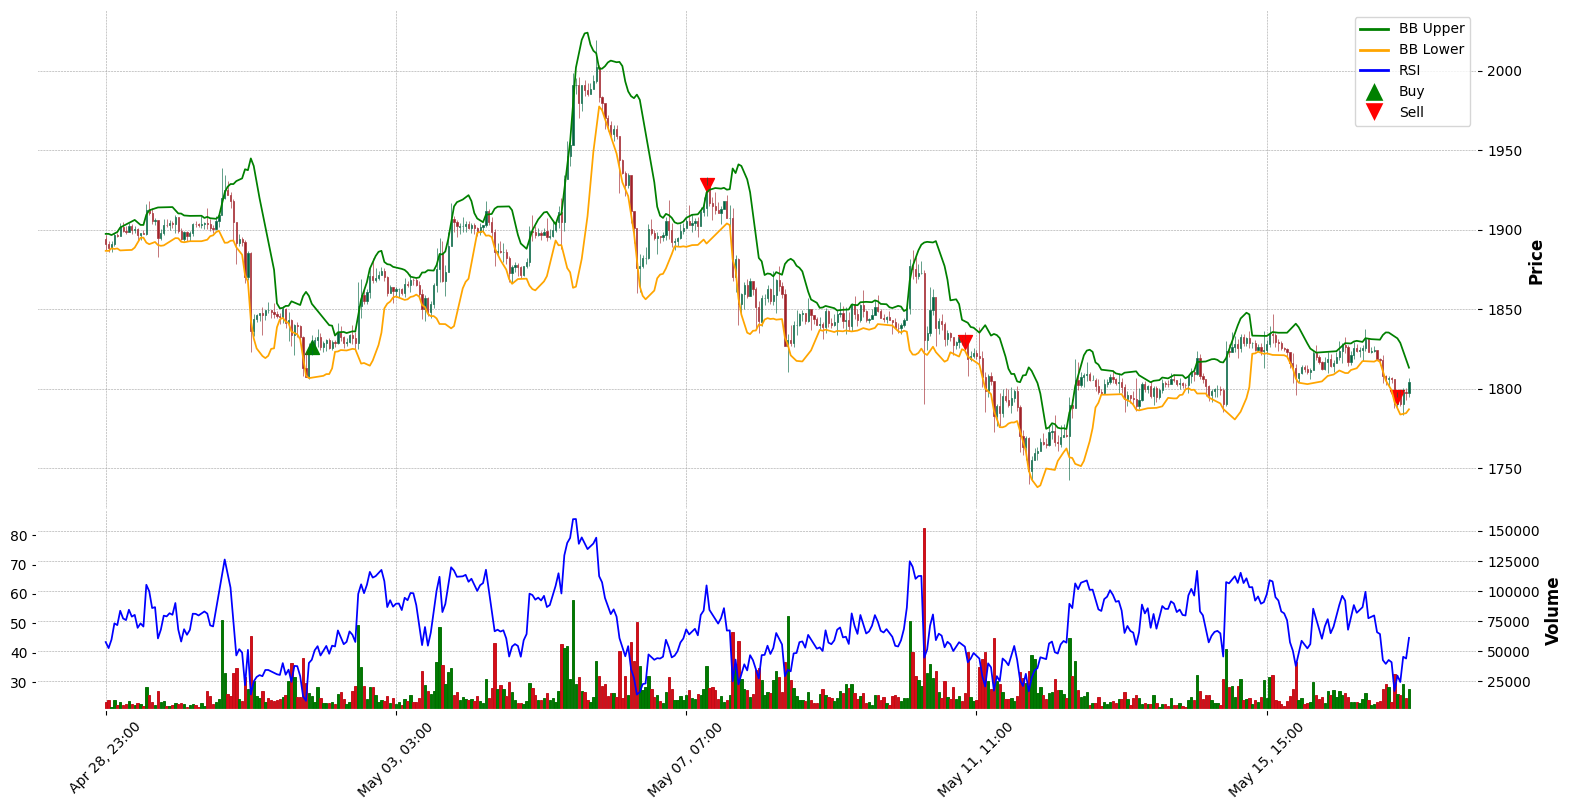

In [ ]:
# Charger les données depuis un fichier CSV pour chaque pli
df_fold = pd.read_csv("/content/test_results.csv", index_col=0, parse_dates=True)

# Sélectionner la plage de lignes souhaitée
start_index = 8000
end_index = 8450
df_fold_selected = df_fold.iloc[start_index:end_index]

# Créer des données pour les marqueurs d'achat et de vente
buy_data = np.full(len(df_fold_selected), np.nan)
buy_data[df_fold_selected['Action'] == 0] = df_fold_selected[df_fold_selected['Action'] == 0]['Close']

sell_data = np.full(len(df_fold_selected), np.nan)
sell_data[df_fold_selected['Action'] == 1] = df_fold_selected[df_fold_selected['Action'] == 1]['Close']

# Créer des tracés supplémentaires pour les indicateurs
apd = [
    mpf.make_addplot(df_fold_selected['BB_Upper'], color='g'),
    mpf.make_addplot(df_fold_selected['BB_Lower'], color='orange'),
    mpf.make_addplot(df_fold_selected['RSI'], panel=1, color='b'),  # Suivi du RSI sur le volume
    mpf.make_addplot(buy_data, type='scatter', markersize=100, marker='^', color='g'),
    mpf.make_addplot(sell_data, type='scatter', markersize=100, marker='v', color='r')
]

# Créer la figure et les axes
fig, ax = mpf.plot(df_fold_selected, type='candle', style='charles', volume=True, addplot=apd, figsize=(20, 10), returnfig=True)

# Créer une légende personnalisée
legend_elements = [
    plt.Line2D([0], [0], color='g', label='BB Upper'),
    plt.Line2D([0], [0], color='orange', label='BB Lower'),
    plt.Line2D([0], [0], color='b', label='RSI'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='g', markersize=15, label='Achat'),
    plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='r', markersize=15, label='Vente')
]

# Ajouter la légende au graphique
ax[0].legend(handles=legend_elements)

# Afficher le graphique
plt.show()


Voici un commentaire sur les éléments observables :

* Graphique en Chandeliers : Chaque bougie indique le prix d'ouverture, de clôture, ainsi que les prix les plus hauts et les plus bas sur une période donnée. Les bougies vertes indiquent généralement une augmentation du prix par rapport à l'ouverture, tandis que les rouges signalent une diminution.

* Bandes de Bollinger (BB Upper et BB Lower) : Ces deux lignes encadrent la majorité des mouvements de prix et peuvent servir à identifier la volatilité et les potentiels points de retournement du marché. Lorsque le prix touche ou franchit ces bandes, cela peut signaler des conditions de surachat ou de survente.

* Indicateur RSI : Le Relative Strength Index (RSI) est un oscillateur de momentum qui mesure la vitesse et le changement des mouvements de prix. Des valeurs au-dessus de 70 sont souvent interprétées comme des signaux de surachat, tandis que des valeurs en dessous de 30 peuvent indiquer une condition de survente.

* Marqueurs d'Achat et de Vente : Les triangles verts pointant vers le haut (ˆ) représentent les actions d'achat de l'agent, et les triangles rouges pointant vers le bas (v) marquent les actions de vente. Ces marqueurs sont alignés avec les prix de clôture des bougies, donnant un aperçu visuel des décisions de l'agent par rapport aux mouvements de prix.

* Volume : La partie inférieure du graphique montre le volume des échanges, avec des barres vertes indiquant un volume d'achat et des barres rouges signalant un volume de vente. Des pics de volume peuvent coïncider avec des mouvements significatifs des prix ou des marqueurs d'achat/vente.

Dans l'ensemble, le graphique suggère que l'agent de trading exécute des ordres d'achat et de vente en tenant compte des conditions du marché indiquées par les Bandes de Bollinger et le RSI. Une évaluation plus détaillée de la performance de l'agent nécessiterait une analyse des résultats de trading sur une période plus longue, y compris la rentabilité globale et la comparaison avec des stratégies de référence telles que l'achat et la conservation.

### 2) Graphique en Chandeliers avec Marqueurs d'Achat, de Vente, de Prise de Profit et de Stop Loss (Zoom)
La version zoomée du graphique en chandeliers avec les marqueurs d'achat, de vente, de prise de profit et de stop loss offre un aperçu plus détaillé des décisions de trading de l'agent et de leur impact sur les mouvements de prix. Cette visualisation se concentre sur les points de données les plus récents, permettant une analyse plus précise des actions de trading récentes.

En zoomant sur une période spécifique, nous pouvons examiner les décisions de l'agent dans un contexte plus restreint et obtenir des informations sur sa performance dans les conditions de marché actuelles. Le graphique affiche également les niveaux de prise de profit et de stop loss.


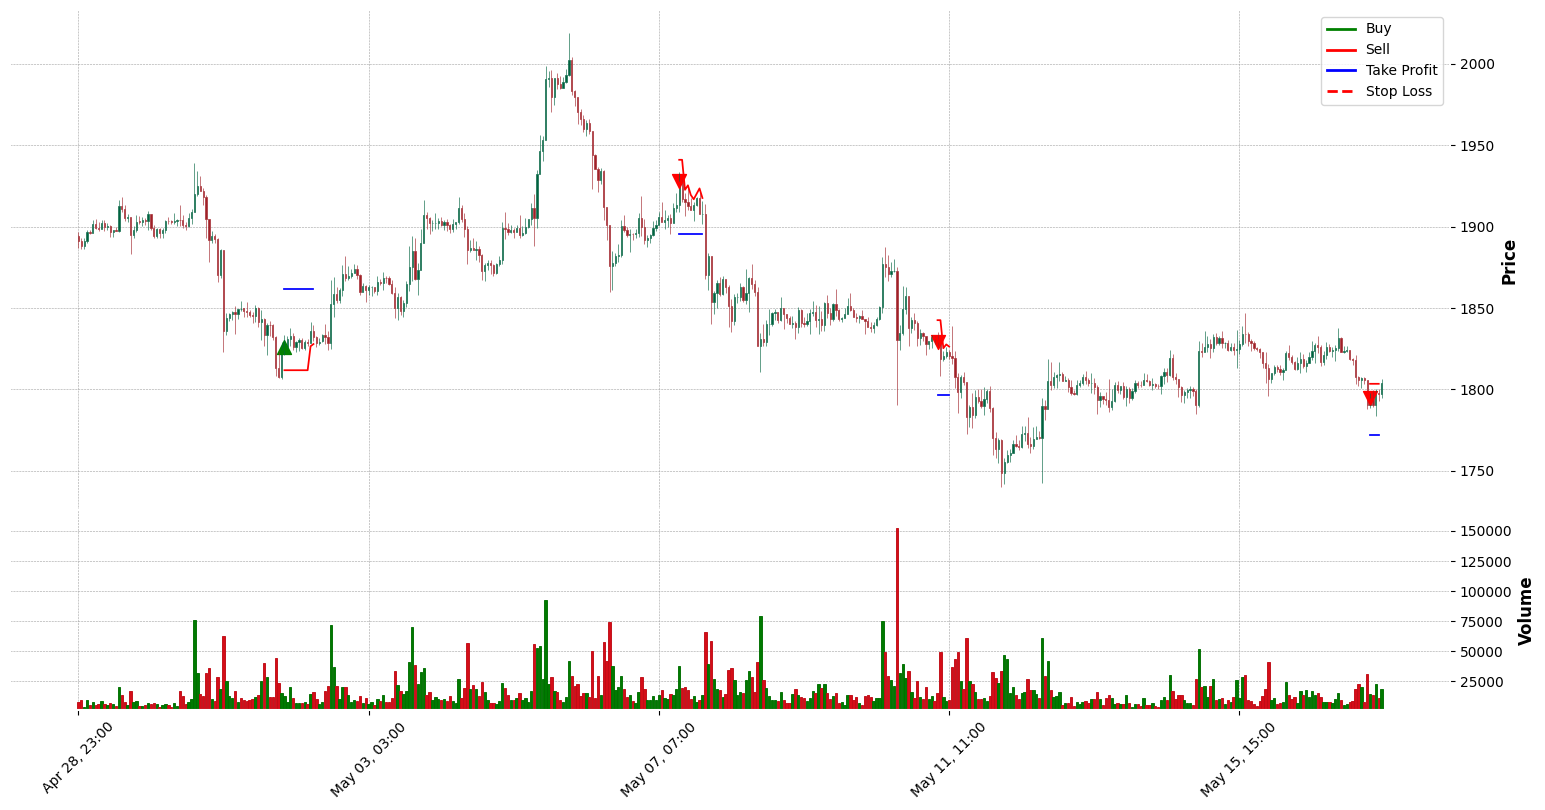

In [ ]:
# Charger les données depuis un fichier CSV
df_fold = pd.read_csv(f"/content/test_results.csv", index_col=0, parse_dates=True)

# Sélectionner la plage désirée de lignes
start_index = 8000
end_index = 8450
df_fold = df_fold.iloc[start_index:end_index]

# Créer des données pour les marqueurs d'achat et de vente
buy_data = np.full(len(df_fold), np.nan)
buy_data[df_fold['Action'] == 0] = df_fold[df_fold['Action'] == 0]['Close']

sell_data = np.full(len(df_fold), np.nan)
sell_data[df_fold['Action'] == 1] = df_fold[df_fold['Action'] == 1]['Close']

# Créer des données pour les niveaux de prise de profit et de stop loss
take_profit_data = df_fold['Take_Profit']
stop_loss_data = df_fold['Stop_Loss']

# Créer des marqueurs plus petits pour les actions d'achat et de vente, et des graphiques linéaires pour les niveaux de prise de profit et de stop loss
apd = [
    mpf.make_addplot(buy_data, type='scatter', markersize=100, marker='^', color='g'),
    mpf.make_addplot(sell_data, type='scatter', markersize=100, marker='v', color='r'),
    mpf.make_addplot(take_profit_data, color='b'),
    mpf.make_addplot(stop_loss_data, color='r')
]

# Créer une légende personnalisée
legend_elements = [
    plt.Line2D([0], [0], color='g', label='Achat'),
    plt.Line2D([0], [0], color='r', label='Vente'),
    plt.Line2D([0], [0], color='b', label='Prise de Profit'),
    plt.Line2D([0], [0], color='r', linestyle='--', label='Stop Loss')
]

# Créer un graphique en chandeliers avec légende
fig, ax = mpf.plot(df_fold, type='candle', style='charles', volume=True, addplot=apd, figsize=(20, 10), returnfig=True)

# Ajouter la légende au graphique
ax[0].legend(handles=legend_elements)

# Afficher le graphique
plt.show()


 Voici un commentaire sur les caractéristiques clés :

* Actions d'Achat et de Vente : Des marqueurs verts en forme de flèche pointée vers le haut indiquent les points d'achat, tandis que les flèches rouges pointées vers le bas marquent les points de vente. Ces marqueurs permettent de visualiser rapidement où l'agent de trading a décidé d'entrer et de sortir du marché.

* Niveaux de Prise de Profit et de Stop Loss : Les lignes horizontales bleues représentent les niveaux de prise de profit, et les lignes noires pointillées indiquent les niveaux de stop loss. Ces niveaux sont cruciaux pour la gestion des risques et des stratégies de sortie.

* Volume : La partie inférieure du graphique présente le volume des transactions, avec des barres vertes pour le volume d'achat et des barres rouges pour le volume de vente. Des pics de volume peuvent coïncider avec des points d'entrée ou de sortie, suggérant une réaction du marché aux actions de l'agent.

* Mouvement des Prix : Le graphique montre les périodes de volatilité où il y a de grands écarts entre les prix hauts et bas, ainsi que les périodes de consolidation où le marché se déplace latéralement.

En somme, le graphique fournit une représentation détaillée de la stratégie de trading de l'agent, y compris où et quand des positions ont été prises, ainsi que la gestion des risques associée à chaque transaction.

### 3) Évolution du Solde dans le Temps
Le graphique de l'évolution du solde dans le temps met en évidence la performance de l'agent de trading en termes de solde de son compte. Il illustre comment le solde de l'agent évolue sur la durée de la période de trading.

Ce graphique nous permet d'évaluer la rentabilité des décisions de trading de l'agent et d'identifier tout changement ou tendance significative dans le solde. Chaque pli est tracé séparément pour comparer la performance à travers les différents plis.


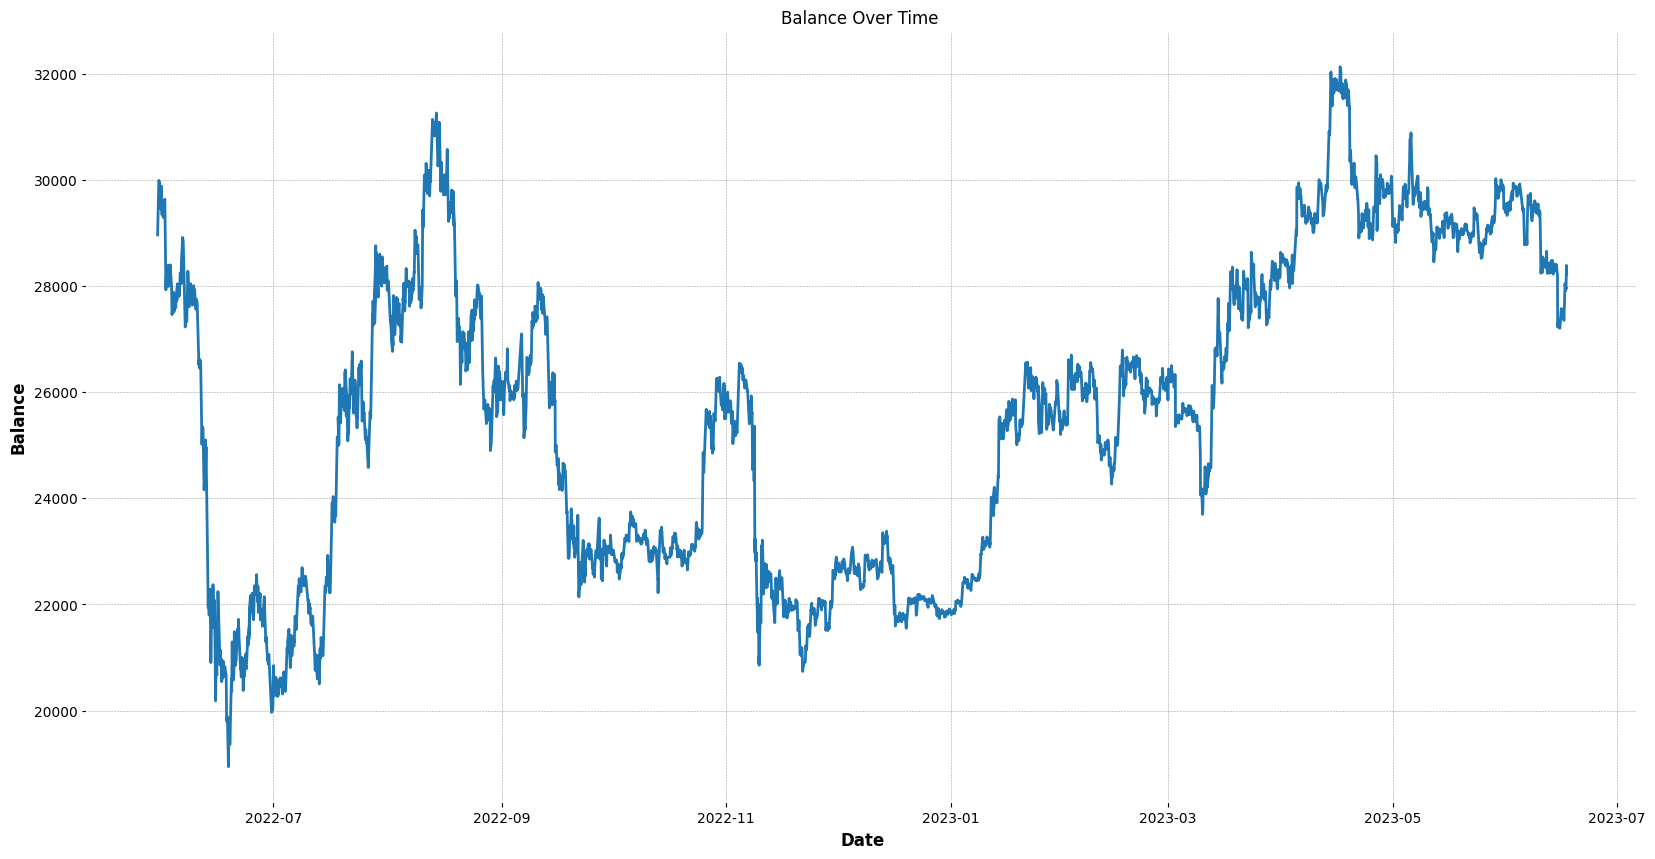

In [ ]:
# Charger les données depuis un fichier CSV pour chaque pli
df2 = pd.read_csv("/content/test_results.csv", index_col=0, parse_dates=True)

# Tracé
plt.figure(figsize=(20, 10))  # Définir la taille de la figure
plt.plot(df2.index, df2['Balance'])  # Tracer le solde
plt.title(f'Évolution du Solde dans le Temps')  # Définir le titre
plt.xlabel('Date')  # Définir l'étiquette de l'axe des x
plt.ylabel('Solde')  # Définir l'étiquette de l'axe des y
plt.grid(True)  # Ajouter une grille
plt.show()  # Afficher le graphique


Le graphique  représente l'évolution du solde d'un compte de trading sur une période donnée. On observe plusieurs points clés :

* Fluctuations : Le solde connaît des fluctuations significatives, suggérant une activité de trading active avec des périodes de gains et de pertes notables.

* Tendances : Il semble y avoir des périodes où le solde augmente de façon constante, indiquant des phases de trading réussies, suivies de chutes qui pourraient représenter des pertes ou des corrections.

* Volatilité : Les pics et les creux indiquent une certaine volatilité dans le solde, ce qui pourrait refléter la nature volatile du marché sur lequel l'agent de trading opère.

* Périodes de récupération : Après des chutes notables, on peut voir des périodes de récupération où le solde remonte, montrant la capacité de l'agent à se redresser après des pertes.

* Évaluation globale : Pour évaluer complètement l'efficacité de l'agent de trading, il serait nécessaire de comparer ces résultats avec des indicateurs de référence du marché, ainsi que d'examiner les stratégies et les risques associés aux transactions.

### 4)  Comparaison avec la Stratégie d'Achat et de Conservation
Le graphique de comparaison présente la performance de l'agent de trading par rapport à une stratégie d'achat et de conservation. La stratégie d'achat et de conservation suppose l'achat de l'actif au prix initial et sa conservation jusqu'à la fin de la période de trading.

Ce graphique nous permet d'évaluer la performance de l'agent par rapport à une stratégie d'investissement passive. Il aide à déterminer si l'approche de trading actif de l'agent est plus performante ou moins performante que la stratégie d'achat et de conservation. Chaque pli est tracé séparément pour comparer la performance à travers les différents plis.


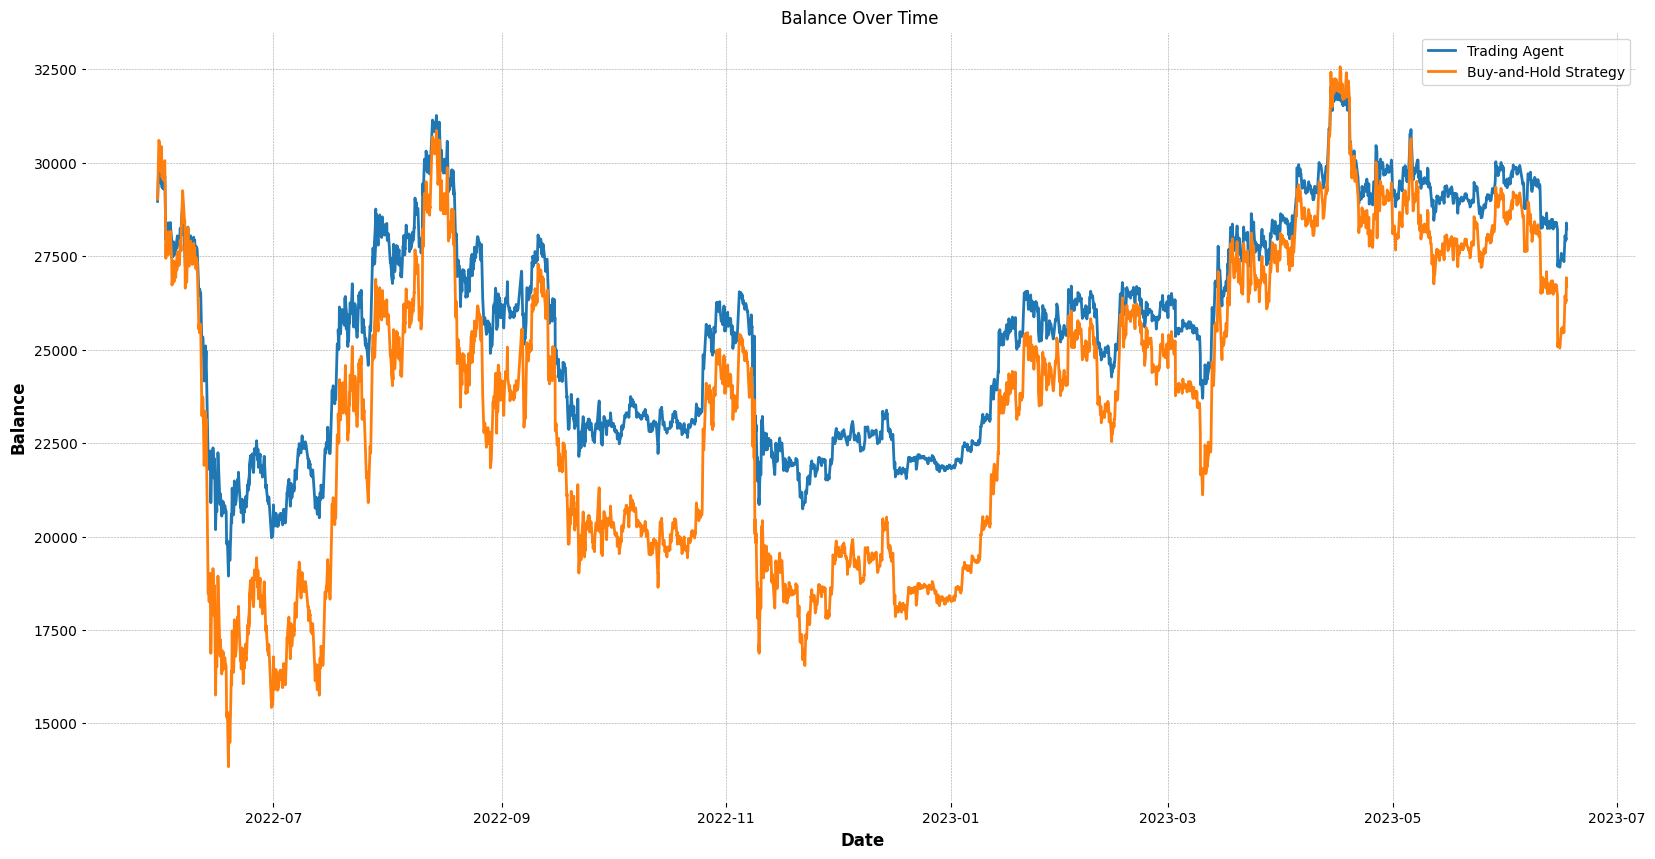

In [ ]:
# Charger les données depuis un fichier CSV pour chaque pli

df_fold = pd.read_csv("/content/test_results.csv", index_col=0, parse_dates=True)

# Calculer le solde de la stratégie d'Achat et de Conservation
prix_initial = df_fold['Open'].iloc[0]  # Obtenir le prix au premier pas de temps
solde_initial = df_fold['Balance'].iloc[0]  # Obtenir le solde initial
crypto_achetée = solde_initial / prix_initial  # Calculer la quantité de crypto qui aurait été achetée

# Calculer la valeur de la stratégie d'achat et de conservation au fil du temps
df_fold['BuyAndHoldBalance'] = crypto_achetée * df_fold['Close']

# Tracé
plt.figure(figsize=(20, 10))  # Définir la taille de la figure
plt.plot(df_fold.index, df_fold['Balance'], label='Agent de Trading')  # Tracer le solde de l'agent de Trading
plt.plot(df_fold.index, df_fold['BuyAndHoldBalance'], label='Stratégie d’Achat et de Conservation')  # Tracer le solde d'Achat et de Conservation
plt.title('Évolution du Solde dans le Temps')  # Définir le titre
plt.xlabel('Date')  # Définir l'étiquette de l'axe des x
plt.ylabel('Solde')  # Définir l'étiquette de l'axe des y
plt.grid(True)  # Ajouter une grille
plt.legend()  # Ajouter une légende
plt.show()  # Afficher le graphique


Le graphique montre deux courbes représentant l'évolution du solde d'un compte de trading sur le temps, comparant la performance d'un agent de trading actif avec une stratégie d'achat et de conservation.

* Agent de Trading (en bleu) : La courbe bleue illustre les fluctuations du solde du compte géré par l'agent de trading. On observe des variations considérables, ce qui suggère que l'agent prend des décisions actives qui impactent significativement le solde.

* Stratégie d'Achat et de Conservation (en orange) : La courbe orange trace l'évolution hypothétique du solde si une stratégie passive d'achat et de conservation avait été adoptée. Cette stratégie suppose l'achat de l'actif au début de la période et sa conservation jusqu'à la fin sans actions supplémentaires.

* Les deux courbes fluctuent et se croisent à plusieurs reprises, indiquant que la performance de l'agent de trading active oscille entre surperformer et sous-performer par rapport à la stratégie passive. À certains moments, l'agent de trading semble avoir un solde supérieur à celui de la stratégie d'achat et de conservation, tandis qu'à d'autres moments, il est inférieur.

=> La comparaison sur la durée complète montre l'importance de la stratégie et de la prise de décision dans le trading, et souligne la question essentielle de savoir si une approche active offre des retours suffisamment élevés pour justifier les risques et l'effort supplémentaires par rapport à une stratégie d'investissement passive.

In [51]:
# Charger les données depuis un fichier CSV pour chaque pli

df_fold = pd.read_csv("/content/test_results.csv", index_col=0, parse_dates=True)

# En supposant que vous ayez un DataFrame pandas nommé `train_df` qui contient les données d'entraînement
nombre_achats = (df_fold['Action'] == 0).sum()
nombre_ventes = (df_fold['Action'] == 1).sum()

échantillons_total = len(df_fold)
pourcentage_achats = nombre_achats / échantillons_total
pourcentage_ventes = nombre_ventes / échantillons_total

print(f"Actions d'achat : {nombre_achats} échantillons ({pourcentage_achats:.2%})")
print(f"Actions de vente : {nombre_ventes} échantillons ({pourcentage_ventes:.2%})")



Actions d'achat : 8 échantillons (0.09%)
Actions de vente : 33 échantillons (0.36%)


Ce code permet d'analyser le nombre et le pourcentage d'actions d'achat et de vente dans un ensemble de données de trading. Il affiche le nombre total d'actions d'achat et de vente ainsi que leur proportion relative par rapport au nombre total d'échantillons.






L'output indique que dans l'ensemble de données analysé, il y a eu 8 actions d'achat, ce qui représente 0.09% du total des échantillons.
* Cela suggère que l'agent de trading a pris relativement peu de décisions d'achat sur la période considérée. En comparaison, il y a eu 33 actions de vente, ce qui constitue 0.36% du total des échantillons, indiquant que l'agent a effectué plus de ventes que d'achats.



* Ces chiffres pourraient refléter une stratégie de trading où l'agent est peut-être plus enclin à vendre ou où les conditions du marché ont conduit à davantage d'opportunités de vente jugées favorables par l'agent de trading.
* Le faible pourcentage d'actions dans les deux cas suggère une approche de trading très sélective ou un marché peut-être moins actif pendant la période analysée.